### Linear Regression
- Since, training set in supervised learning model includes both input features and output targets.
- Then, after feeding this training set to our learning algorithm, it will produce a function(f).
- This function f is called **Hypothesis** or **Model**.
- The job with f is to take a new input feature called x and output an estimate or a prediction which is called ŷ. (Remember, y is the actual true value or the target variable in the training set.) (ŷ != y)

### How to compute or represent f ??
Let it be straight line as of now. Then, it can be represented as;
$$
f𝓌,ᵦ (x) = wx + b
$$
or
$$
f (x) = wx + b
$$

For Example: Below is an example of linear regression model using a dataset of [Diabeties Patients](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

# Load the diabetes data
x, y = datasets.load_diabetes(return_X_y=True)

# Print the shape of the data and the first row
print(x.shape)

(442, 10)


In [8]:
# Extract the column at index 2
X = x[:, 2]
print(X.shape)

# Reshape to a 2D Array 
X = X.reshape((-1, 1))
print(X.shape)

(442,)
(442, 1)


In [9]:
# Split data into training and testing data

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(146, 1)
(146,)
(296, 1)
(296,)


In [10]:
# Create the linear regression model and train it with our data
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict using our test data
y_pred = model.predict(X_test)

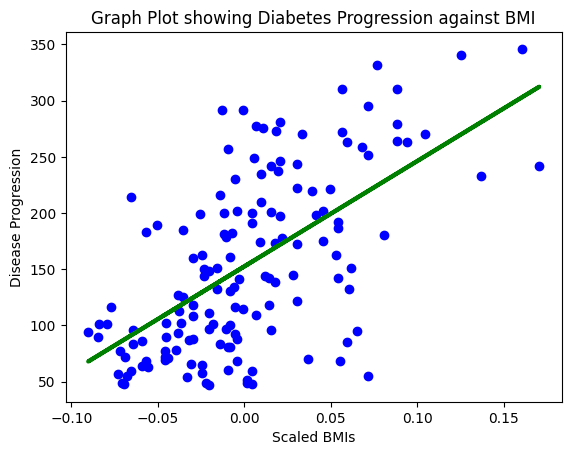

In [12]:
# Create a scatter plot
plt.scatter(X_test, y_test, color='blue')

# Plot the predictions
plt.plot(X_test, y_pred, color='green', linewidth=3)

# Add labels and titles
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('Graph Plot showing Diabetes Progression against BMI')

# Draw the Plot
plt.show()

### Implementation of Linear Regression without using external libraries

#### Terminologies
1. x -> Input variable/feature
2. y -> Output/Target variable/feature
3. m -> Total no. of training examples in training set

#### Cost Function (Also, called Cost Squared Error Cost Function)
It will tell how good or bad our model is doing, so that we can try to make it better.
$$
J(w,b) = \frac{1}{2m}\sum_{i = 1}^{m}{(\hat{y}^{(i)} - y^{(i)})^{2}}
$$

Here,
- $\hat{y}^{(i)}$ -> i<sup>th</sup> Predicted Value
- $y^{(i)}$ -> i<sup>th</sup> Target Value

#### Linear Regression Model
$$
f (x) = wx + b
$$

Here, w and b are parameters.

#### Goal
Our goal is to find the values of w and b to make the cost function as small as possible. Or,
$$
minimize (J(w,b))
$$

### Gradient Descent
- One of the most important algorithm in machine learning.
- Algorithm which helps finding values of w and b that minimizes the cost function J.
- Also used in deep learning models.
- Algorithm which helps in minimizing any function not just linear Regression.

#### Outline of Gradient Descent
- Start with some values of w and b. (Like, Set w = 0, b = 0)
- Keep changing w and b to reduce J(w,b).
- Until we set at or near a minimum for Cost Function J.

### How to change w and b?
$$
w = w - \alpha \frac{\partial J(w, b)}{\partial w}
$$
$$
b = b - \alpha \frac{\partial J(w, b)}{\partial b}
$$

Here, 
- $\alpha$ is called **Learning Rate**
- Simultaneously, update w and b at the same time.

### Simultaneously Updation of parameters w and b

|                     <h4>Correct Way</h4>                   |                   <h4>Incorrect Way</h4>                   |
| ---------------------------------------------------------- | ---------------------------------------------------------- |
| $temp\_w = w - \alpha \frac{\partial J(w, b)}{\partial w}$ | $temp\_w = w - \alpha \frac{\partial J(w, b)}{\partial w}$ |
| $temp\_b = b - \alpha \frac{\partial J(w, b)}{\partial b}$ |                        $w = temp\_w$                       |
|                       $w = temp\_w$                        | $temp\_b = b - \alpha \frac{\partial J(w, b)}{\partial b}$ |
|                       $b = temp\_b$                        |                        $b = temp\_b$                       |